# SOM Assignment  
## Moslem Yazdanpanah 9817022120


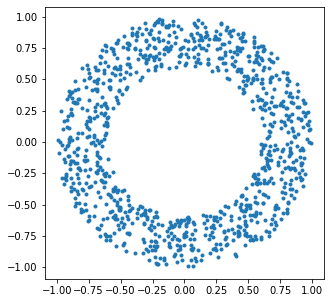

In [5]:
import numpy as np 
import matplotlib.pyplot as plt

num_samples = 1000
outerRadius = 1
innerRadius = .6

# generate the points
theta =np.random.uniform(0,2*np.pi,num_samples)
r = np.random.uniform(innerRadius,outerRadius,num_samples)
inputs = np.c_[r * np.cos(theta),r * np.sin(theta)]

# plots
plt.figure(figsize=(5,5))
plt.plot(inputs[:,0],inputs[:,1], linestyle='', marker='.')
plt.show(block=True)


### Now, we generate 100 random cluster point as cohenen layer


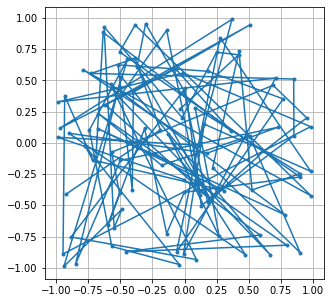

In [6]:
weights = np.c_[np.random.uniform(-1,1,100),np.random.uniform(-1,1,100)]

plt.figure(figsize=(5,5))
plt.plot(weights[:,0], weights[:,1], linestyle='-', marker='.')
plt.grid()
plt.show(block=True)

### Return the winner index by distance

In [0]:
def winner(inpoint,SOMs):
    winnerindex = 0
    winnerDist = 1000    
    
    for i in range(SOMs[:,0].size):
        # calculate the distance
        dist = np.linalg.norm(inpoint-SOMs[i])
        if dist<winnerDist:
            winnerDist = dist
            winnerindex = i
    return winnerindex    

### Run the epoches

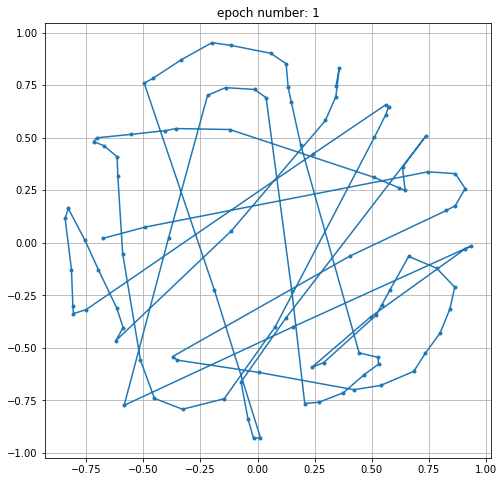

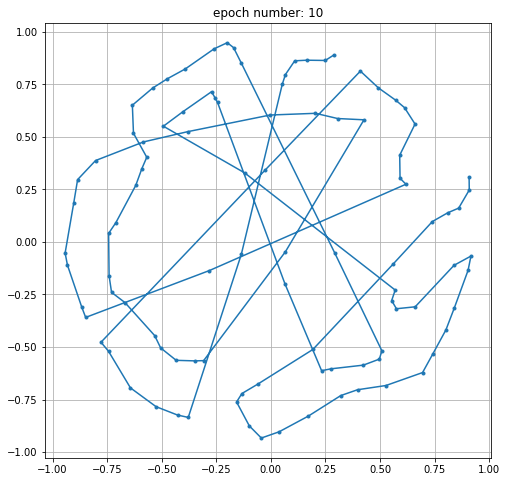

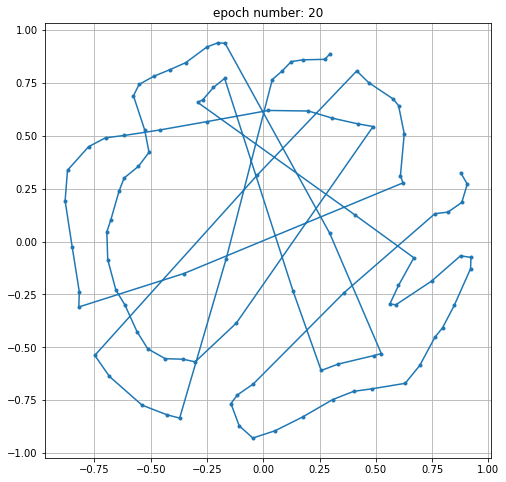

In [0]:
# number of epoches
lRate = 0.5
for epoch in range(50):
    # number of samples
    for i in range(num_samples):
        # get the winner index
        wi = winner(inputs[i],weights)
        
        # update winner wieght
        weights[wi] = weights[wi] + lRate * (inputs[i]-weights[wi])
        
        # update winner neighbours wieght
        if wi > 0:
            weights[wi- 1] = weights[wi - 1] + (lRate / 1.5) * (inputs[i]-weights[wi - 1])
        if wi < (weights[:,0].size - 1):
            weights[wi + 1] = weights[wi + 1] + (lRate / 1.5) * (inputs[i]-weights[wi + 1])
    
    # reduce learning rate
    lRate -= .01
    
    # plot the SOM every 10 epoches
    if ((epoch + 1 ) %10 == 0 or epoch == 0):                
        plt.figure(figsize=(8,8))
        plt.title("epoch number: %s"% (epoch+1))
        plt.plot(weights[:,0], weights[:,1], linestyle='-', marker='.')
        plt.grid() 
        plt.show(block=True)
    